In [1]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_recall_curve

In [32]:
pcos_fertility = pd.read_csv("")

In [33]:
pcos_data.columns

Index(['Email', 'Name', 'Frequency', 'How_Often', 'Pain_Scale', 'Flow_scale',
       'Spotting_scale', 'Unecessary_Hair', 'Hair_loss', 'Acne',
       'Weight_Measure', 'Difficult_Losing', 'Insulin_Resis', 'Low_energy',
       'Mood_Swings', 'Trouble_Sleep', 'Activity', 'Diagnose_PCOS', 'Age',
       'FH', 'MC', 'LH', 'FSH', 'AMH', 'BMI', 'TT ng/dL'],
      dtype='object')

In [34]:
# Check missing values
missing_values = pcos_data.isnull().sum()
print(missing_values[missing_values > 0])

Hair_loss      1
Mood_Swings    1
dtype: int64


In [45]:
X.fillna(X.mean(), inplace=True)  # Replace NaN with column mean

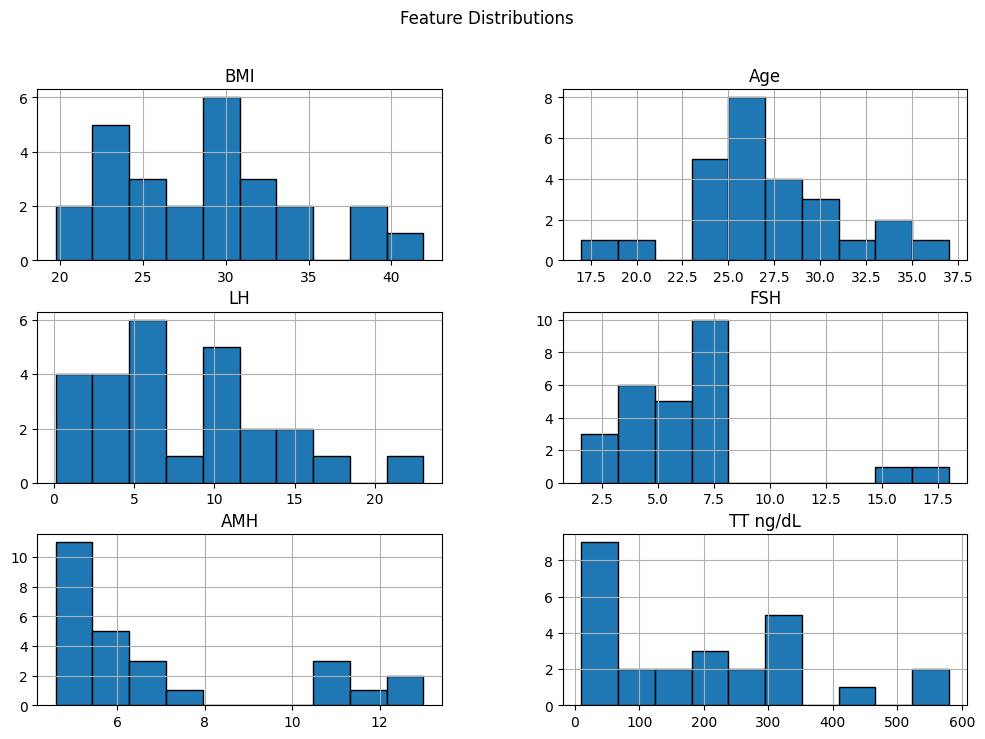

In [46]:
# Select important features for distribution plots
features = ["BMI", "Age", "LH", "FSH", "AMH", "TT ng/dL"]

# Plot histograms
pcos_data[features].hist(figsize=(12, 8), bins=10, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()


In [47]:
# Check data types of columns
print(pcos_data.dtypes)

Frequency              int8
How_Often              int8
Pain_Scale             int8
Flow_scale             int8
Spotting_scale        int64
Unecessary_Hair       int64
Hair_loss           float64
Acne                  int64
Weight_Measure       object
Difficult_Losing     object
Insulin_Resis         int64
Low_energy            int64
Mood_Swings         float64
Trouble_Sleep         int64
Activity               int8
Diagnose_PCOS         int64
Age                   int64
FH                    int64
MC                    int64
LH                  float64
FSH                 float64
AMH                 float64
BMI                 float64
TT ng/dL            float64
dtype: object


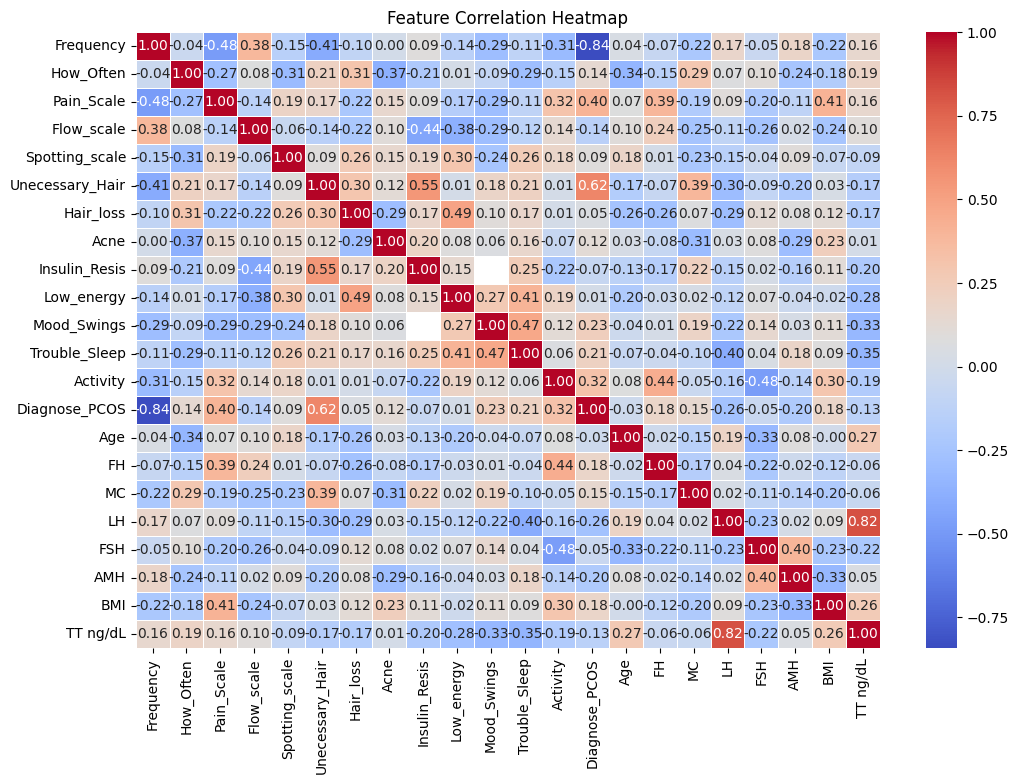

In [48]:
# Drop unnecessary columns
pcos_data = pcos_data.drop(columns=["Email", "Name"], errors="ignore")

# Convert Yes/No responses to 1/0
binary_columns = ["Spotting_scale", "Unecessary_Hair", "Hair_loss", "Acne", 
                  "Difficult_Losing", "Insulin_Resis", "Low_energy", 
                  "Mood_Swings", "Trouble_Sleep", "Diagnose_PCOS"]

pcos_data[binary_columns] = pcos_data[binary_columns].replace({"Yes": 1, "No": 0})

# Convert categorical scales to numeric using label encoding
categorical_columns = ["Frequency", "How_Often", "Pain_Scale", "Flow_scale", "Activity"]
for col in categorical_columns:
    pcos_data[col] = pcos_data[col].astype("category").cat.codes

# Select only numeric columns for correlation
numeric_pcos_data = pcos_data.select_dtypes(include=["number"])

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_pcos_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


/var/folders/w_/8xlhc6cx7gl3qk2hflhz4cw40000gn/T/ipykernel_1663/698074029.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Diagnose_PCOS", data=pcos_data, palette="Set2")


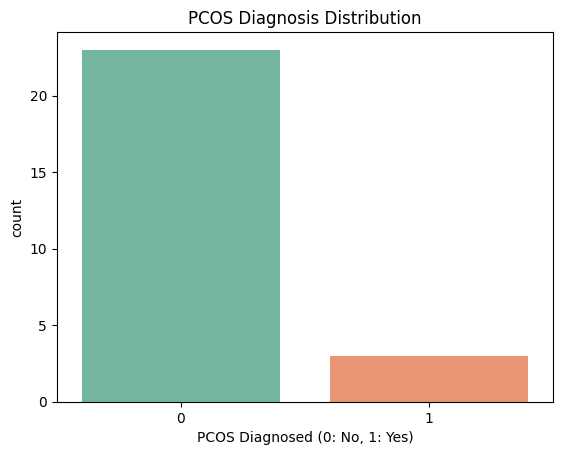

In [49]:
# Convert "PCOS_Diagnosed" to numeric (if not already)
pcos_data["Diagnose_PCOS"] = pcos_data["Diagnose_PCOS"].replace({"Yes": 1, "No": 0}).astype(int)

sns.countplot(x="Diagnose_PCOS", data=pcos_data, palette="Set2")
plt.title("PCOS Diagnosis Distribution")
plt.xlabel("PCOS Diagnosed (0: No, 1: Yes)")
plt.show()


In [50]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")  # Fill NaNs with column mean
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [54]:
# ✅ 1. Identify numerical and categorical columns
num_cols = pcos_data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = pcos_data.select_dtypes(include=["object"]).columns

# ✅ 2. Handle missing values
# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy="mean")
pcos_data[num_cols] = num_imputer.fit_transform(pcos_data[num_cols])

# Impute categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy="most_frequent")
pcos_data[cat_cols] = cat_imputer.fit_transform(pcos_data[cat_cols])

# ✅ 3. Convert categorical features to numerical using Label Encoding
encoder = LabelEncoder()
# ✅ Convert all categorical columns to strings before encoding
for col in cat_cols:
    pcos_data[col] = pcos_data[col].astype(str)  # Convert to string
    pcos_data[col] = encoder.fit_transform(pcos_data[col])  # Apply LabelEncoder

print("✅ Missing values handled. Data is now numeric and ready for model training.")

✅ Missing values handled. Data is now numeric and ready for model training.


Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

Confusion Matrix:
 [[4 0]
 [2 0]]
AUC-ROC Score: 0.5


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

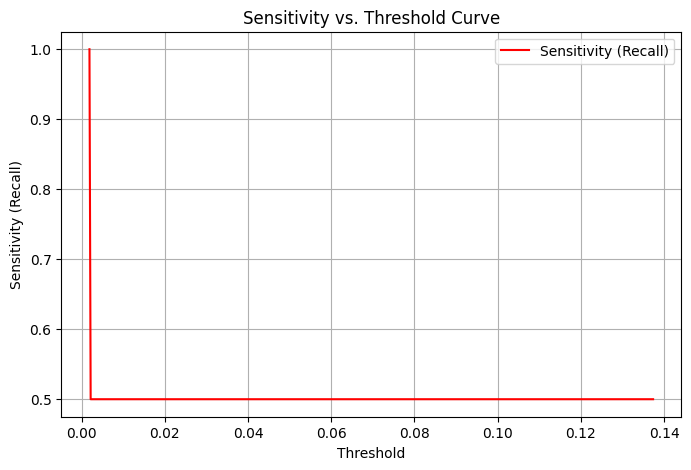

In [60]:
# ✅ 2. Handle Missing Values
imputer = SimpleImputer(strategy="mean")  # Fill missing values with column mean
pcos_data = pd.DataFrame(imputer.fit_transform(pcos_data), columns=pcos_data.columns)

# ✅ 3. Convert categorical target variable to numeric
pcos_data["Diagnose_PCOS"] = pcos_data["Diagnose_PCOS"].replace({"Yes": 1, "No": 0}).astype(int)

# ✅ 4. Encode categorical features
pcos_data = pd.get_dummies(pcos_data, drop_first=True)  # One-hot encoding for categorical columns

# ✅ 5. Define features (X) and target variable (y)
X = pcos_data.drop(columns=["Diagnose_PCOS"])
y = pcos_data["Diagnose_PCOS"]

# ✅ 6. Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 7. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# ✅ 8. Make Predictions
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]  # Get probability scores

# ✅ 9. Evaluate Model Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_scores))

# ✅ 10. Plot Sensitivity (Recall) Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, recall[:-1], label="Sensitivity (Recall)", color="red")
plt.xlabel("Threshold")
plt.ylabel("Sensitivity (Recall)")
plt.title("Sensitivity vs. Threshold Curve")
plt.legend()
plt.grid()
plt.show()
